In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import os
from PIL import Image

import tensorflow as tf

with tf.device('/gpu:1'):
    config = tf.compat.v1.ConfigProto()
    config.gpu_options.allow_growth = True
    tf.compat.v1.keras.backend.set_session(tf.compat.v1.Session(config=config))


# Keras Libraries
import keras
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.preprocessing.image import ImageDataGenerator, load_img
from sklearn.metrics import classification_report, confusion_matrix
%matplotlib inline

Using TensorFlow backend.


# Load Data

In [2]:
train_folder= './common/data/chest_xray/train/'
val_folder = './common/data/chest_xray/val/'
test_folder = './common/data/chest_xray/test/'

Set up Training Folders

In [3]:
# train 
os.listdir(train_folder)
train_n = train_folder+'NORMAL/'
train_p = train_folder+'PNEUMONIA/'

Set up Testing Folders

In [4]:
# test
os.listdir(test_folder)
train_n = test_folder+'NORMAL/'
train_p = test_folder+'PNEUMONIA/'

234
normal picture title:  IM-0101-0001.jpeg
pneumonia picture title: person121_bacteria_576.jpeg


Text(0.5, 1.0, 'Pneumonia')

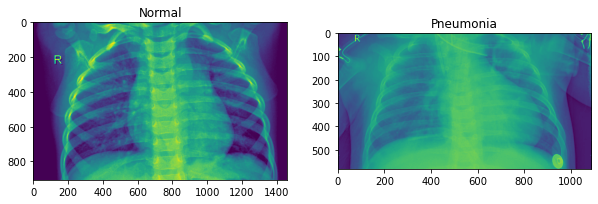

In [5]:
#Normal pic 
print(len(os.listdir(train_n)))
rand_norm= np.random.randint(0,len(os.listdir(train_n)))
norm_pic = os.listdir(train_n)[rand_norm]
print('normal picture title: ',norm_pic)

norm_pic_address = train_n+norm_pic

#Pneumonia
rand_p = np.random.randint(0,len(os.listdir(train_p)))

sic_pic =  os.listdir(train_p)[rand_norm]
sic_address = train_p+sic_pic
print('pneumonia picture title:', sic_pic)

# Load images
norm_load = Image.open(norm_pic_address)
sic_load = Image.open(sic_address)

# plot images
f = plt.figure(figsize= (10,6))
a1 = f.add_subplot(1,2,1)
img_plot = plt.imshow(norm_load)
a1.set_title('Normal')

a2 = f.add_subplot(1, 2, 2)
img_plot = plt.imshow(sic_load)
a2.set_title('Pneumonia')

# Generate Dataset from image data

In [6]:
from common.src import util

train_datagen = util.create_train_datagen()
test_datagen = util.create_test_datagen()

training_set = util.create_generator_set(train_datagen, './common/data/chest_xray/train/')
validation_generator = util.create_generator_set(test_datagen, './common/data/chest_xray/val/')
test_set = util.create_generator_set(test_datagen, './common/data/chest_xray/test/', batch_size = 1, shuffle = False)

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


# Create/Load Model

In [7]:
from common.src import models

cnn = models.CNNModel()
cnn.create_model(do_regularization=True)
cnn.summary()

# Fit Model

In [8]:
cnn_model = cnn.fit_generator(training_set, validation_generator, epochs = 100)

Epoch 1/100
163/163 [==============================] - 58s 357ms/step - loss: 0.9315 - tp: 4081.0000 - fp: 1179.0000 - tn: 4037.0000 - fn: 1135.0000 - accuracy: 0.7782 - precision: 0.7759 - recall: 0.7824 - auc: 0.8398 - val_loss: 0.7944 - val_tp: 190.0000 - val_fp: 114.0000 - val_tn: 190.0000 - val_fn: 114.0000 - val_accuracy: 0.6250 - val_precision: 0.6250 - val_recall: 0.6250 - val_auc: 0.7227
Epoch 2/100
163/163 [==============================] - 50s 305ms/step - loss: 0.5146 - tp: 4364.0000 - fp: 848.0000 - tn: 4368.0000 - fn: 852.0000 - accuracy: 0.8370 - precision: 0.8373 - recall: 0.8367 - auc: 0.9150 - val_loss: 0.7384 - val_tp: 190.0000 - val_fp: 114.0000 - val_tn: 190.0000 - val_fn: 114.0000 - val_accuracy: 0.6250 - val_precision: 0.6250 - val_recall: 0.6250 - val_auc: 0.7559
Epoch 3/100
163/163 [==============================] - 49s 303ms/step - loss: 0.4593 - tp: 4435.0000 - fp: 770.0000 - tn: 4446.0000 - fn: 781.0000 - accuracy: 0.8513 - precision: 0.8521 - recall: 0.8503

Epoch 22/100
163/163 [==============================] - 51s 314ms/step - loss: 0.3503 - tp: 4646.0000 - fp: 560.0000 - tn: 4656.0000 - fn: 570.0000 - accuracy: 0.8917 - precision: 0.8924 - recall: 0.8907 - auc: 0.9577 - val_loss: 0.8490 - val_tp: 152.0000 - val_fp: 114.0000 - val_tn: 190.0000 - val_fn: 152.0000 - val_accuracy: 0.5625 - val_precision: 0.5714 - val_recall: 0.5000 - val_auc: 0.6367
Epoch 23/100
163/163 [==============================] - 52s 318ms/step - loss: 0.3560 - tp: 4616.0000 - fp: 595.0000 - tn: 4621.0000 - fn: 600.0000 - accuracy: 0.8854 - precision: 0.8858 - recall: 0.8850 - auc: 0.9564 - val_loss: 0.8442 - val_tp: 190.0000 - val_fp: 133.0000 - val_tn: 171.0000 - val_fn: 114.0000 - val_accuracy: 0.5938 - val_precision: 0.5882 - val_recall: 0.6250 - val_auc: 0.6211
Epoch 24/100
163/163 [==============================] - 51s 312ms/step - loss: 0.3550 - tp: 4629.0000 - fp: 583.0000 - tn: 4633.0000 - fn: 587.0000 - accuracy: 0.8878 - precision: 0.8881 - recall: 0.887

Epoch 43/100
163/163 [==============================] - 52s 322ms/step - loss: 0.3261 - tp: 4678.0000 - fp: 542.0000 - tn: 4674.0000 - fn: 538.0000 - accuracy: 0.8965 - precision: 0.8962 - recall: 0.8969 - auc: 0.9641 - val_loss: 0.8221 - val_tp: 171.0000 - val_fp: 133.0000 - val_tn: 171.0000 - val_fn: 133.0000 - val_accuracy: 0.5625 - val_precision: 0.5625 - val_recall: 0.5625 - val_auc: 0.6699
Epoch 44/100
163/163 [==============================] - 53s 325ms/step - loss: 0.3104 - tp: 4716.0000 - fp: 498.0000 - tn: 4718.0000 - fn: 500.0000 - accuracy: 0.9043 - precision: 0.9045 - recall: 0.9041 - auc: 0.9694 - val_loss: 0.6632 - val_tp: 209.0000 - val_fp: 95.0000 - val_tn: 209.0000 - val_fn: 95.0000 - val_accuracy: 0.6875 - val_precision: 0.6875 - val_recall: 0.6875 - val_auc: 0.7637
Epoch 45/100
163/163 [==============================] - 51s 312ms/step - loss: 0.3261 - tp: 4685.0000 - fp: 537.0000 - tn: 4679.0000 - fn: 531.0000 - accuracy: 0.8976 - precision: 0.8972 - recall: 0.8982 

Epoch 64/100
163/163 [==============================] - 51s 314ms/step - loss: 0.3052 - tp: 4725.0000 - fp: 493.0000 - tn: 4723.0000 - fn: 491.0000 - accuracy: 0.9057 - precision: 0.9055 - recall: 0.9059 - auc: 0.9696 - val_loss: 1.0677 - val_tp: 209.0000 - val_fp: 95.0000 - val_tn: 209.0000 - val_fn: 95.0000 - val_accuracy: 0.6875 - val_precision: 0.6875 - val_recall: 0.6875 - val_auc: 0.6504
Epoch 65/100
163/163 [==============================] - 51s 314ms/step - loss: 0.2985 - tp: 4769.0000 - fp: 449.0000 - tn: 4767.0000 - fn: 447.0000 - accuracy: 0.9141 - precision: 0.9140 - recall: 0.9143 - auc: 0.9724 - val_loss: 0.6033 - val_tp: 228.0000 - val_fp: 76.0000 - val_tn: 228.0000 - val_fn: 76.0000 - val_accuracy: 0.7500 - val_precision: 0.7500 - val_recall: 0.7500 - val_auc: 0.8359
Epoch 66/100
163/163 [==============================] - 51s 314ms/step - loss: 0.3020 - tp: 4748.0000 - fp: 469.0000 - tn: 4747.0000 - fn: 468.0000 - accuracy: 0.9102 - precision: 0.9101 - recall: 0.9103 - 

Epoch 85/100
163/163 [==============================] - 51s 312ms/step - loss: 0.2865 - tp: 4764.0000 - fp: 452.0000 - tn: 4764.0000 - fn: 452.0000 - accuracy: 0.9133 - precision: 0.9133 - recall: 0.9133 - auc: 0.9733 - val_loss: 0.8026 - val_tp: 190.0000 - val_fp: 114.0000 - val_tn: 190.0000 - val_fn: 114.0000 - val_accuracy: 0.6250 - val_precision: 0.6250 - val_recall: 0.6250 - val_auc: 0.7148
Epoch 86/100
163/163 [==============================] - 51s 314ms/step - loss: 0.2950 - tp: 4744.0000 - fp: 472.0000 - tn: 4744.0000 - fn: 472.0000 - accuracy: 0.9095 - precision: 0.9095 - recall: 0.9095 - auc: 0.9715 - val_loss: 0.5865 - val_tp: 266.0000 - val_fp: 38.0000 - val_tn: 266.0000 - val_fn: 38.0000 - val_accuracy: 0.8750 - val_precision: 0.8750 - val_recall: 0.8750 - val_auc: 0.8594
Epoch 87/100
163/163 [==============================] - 51s 313ms/step - loss: 0.2922 - tp: 4760.0000 - fp: 454.0000 - tn: 4762.0000 - fn: 456.0000 - accuracy: 0.9128 - precision: 0.9129 - recall: 0.9126 

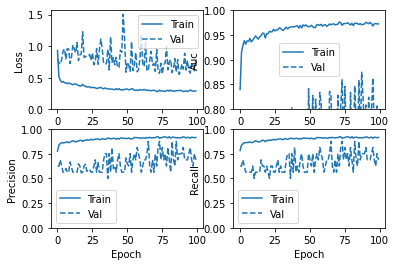

In [9]:
cnn.plot_history()

In [10]:
print(cnn.get_classification_report(test_set))

              precision    recall  f1-score   support

      NORMAL       0.91      0.76      0.83       234
   PNEUMONIA       0.87      0.96      0.91       390

    accuracy                           0.88       624
   macro avg       0.89      0.86      0.87       624
weighted avg       0.89      0.88      0.88       624

None


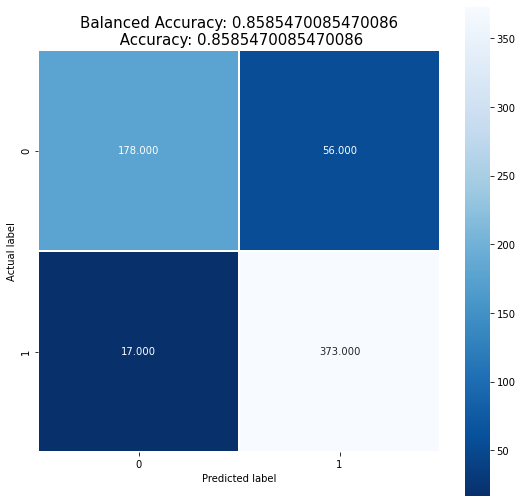

In [11]:
cnn.display_confusion_matrix(test_data_generator = test_set)